In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import platform

In [2]:
# import warnings; warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("train.csv",header=0)

In [4]:
# Generating dataset profile
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,116058
Total Missing (%),0.0%
Total size in memory,25.7 MiB
Average record size in memory,232.0 B
Numeric,20
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,1


In [5]:
df.describe(include='all')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058,116058,116058.000000,1.160580e+05,116058.000000,116058,116058,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
unique,NaN,3,19,NaN,NaN,NaN,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,X,OTHER,NaN,NaN,NaN,2012-02-01,04/2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63858,49699,NaN,NaN,NaN,52334,52840,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.494155e+11,NaN,NaN,3.868961,2.082262e+05,292.280997,NaN,NaN,67.431939,1.593186,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,NaN,NaN,0.461020,1.146851e+05,89.762415,NaN,NaN,17.291719,0.491242,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,NaN,NaN,2.250000,1.100000e+04,60.000000,NaN,NaN,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,NaN,NaN,3.500000,1.200000e+05,180.000000,NaN,NaN,57.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,NaN,NaN,3.875000,1.830000e+05,360.000000,NaN,NaN,72.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,NaN,NaN,4.125000,2.780000e+05,360.000000,NaN,NaN,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


0    99.451998
1     0.548002
Name: m13, dtype: float64

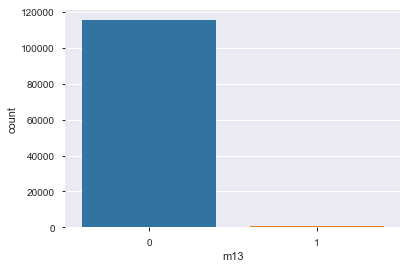

In [13]:
df['m13'].value_counts()
sns.countplot(x='m13',data=df)
plt.show()
(df["m13"].value_counts()/df.shape[0]*100)

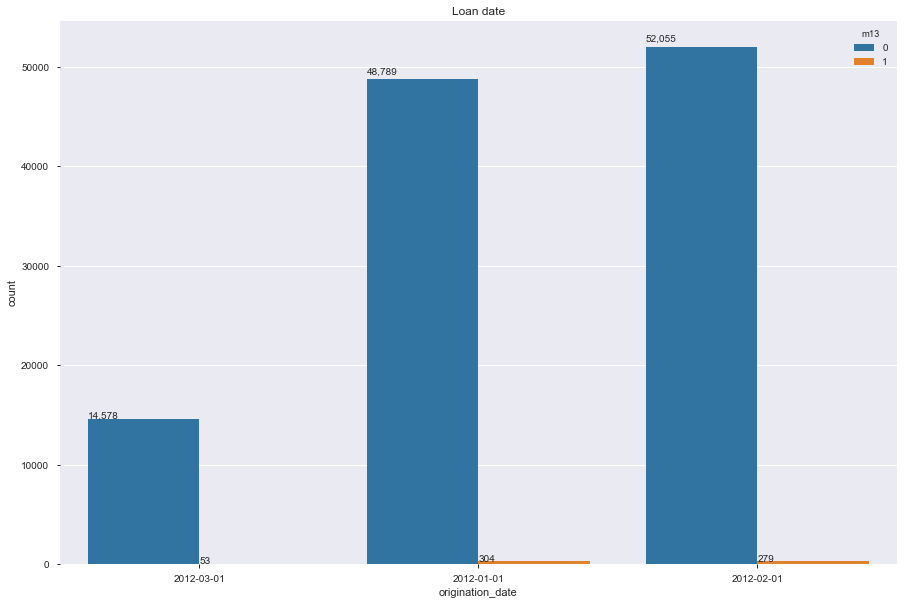

In [12]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(x='origination_date', hue='m13', data=df)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
# plt.show();

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\vimal.p\OneDrive - Subex Limited\Work\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


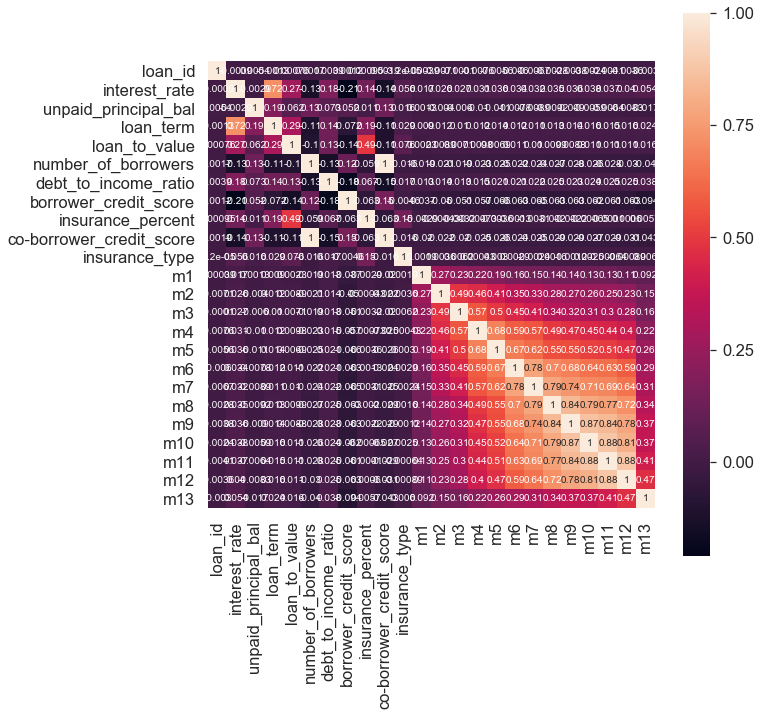

In [15]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [16]:
df['m24'] =  df['m4'] + df['m5'] +df['m6'] + df['m7'] +df['m8'] +df['m9'] + df['m10'] + df['m11'] +df['m12']

In [17]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m5,m6,m7,m8,m9,m10,m11,m12,m13,m24
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,1,0,0,0,0,0,1,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,1,0,1,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,1,1,1,1,1,4
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,4,5,6,7,8,9,10,11,1,63


In [18]:
drop_list = ['origination_date', 'first_payment_date',
                 'loan_id', 'co-borrower_credit_score', 'insurance_type', 'insurance_percent',
                 'financial_institution', 'loan_to_value', 'm3','m2', 'm1', 'debt_to_income_ratio']
df=df.drop(drop_list, axis=1)

In [19]:
df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,number_of_borrowers,borrower_credit_score,loan_purpose,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m24
0,Z,4.250,214000,360,1.0,694.0,C86,0,0,0,1,0,0,0,0,0,1,1
1,Y,4.875,144000,360,1.0,697.0,B12,0,0,0,0,0,0,0,1,0,1,1
2,Z,3.250,366000,180,1.0,780.0,B12,0,0,0,0,0,0,0,0,0,1,0
3,X,4.750,135000,360,2.0,633.0,B12,0,0,0,0,0,1,1,1,1,1,4
4,X,4.750,124000,360,1.0,681.0,C86,3,4,5,6,7,8,9,10,11,1,63


In [20]:
df_cat = df.select_dtypes(['object','category'])
df_num = df.select_dtypes(exclude = ['object','category'])

dummy_list = df_cat.columns
for c in dummy_list:    
    df_cat[c] = pd.Categorical(df_cat[c])
    
dfC = pd.concat([df_num, df_cat], axis=1)
dfC.shape

C:\Users\vimal.p\OneDrive - Subex Limited\Work\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(116058, 18)

In [21]:
df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,number_of_borrowers,borrower_credit_score,loan_purpose,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m24
0,Z,4.250,214000,360,1.0,694.0,C86,0,0,0,1,0,0,0,0,0,1,1
1,Y,4.875,144000,360,1.0,697.0,B12,0,0,0,0,0,0,0,1,0,1,1
2,Z,3.250,366000,180,1.0,780.0,B12,0,0,0,0,0,0,0,0,0,1,0
3,X,4.750,135000,360,2.0,633.0,B12,0,0,0,0,0,1,1,1,1,1,4
4,X,4.750,124000,360,1.0,681.0,C86,3,4,5,6,7,8,9,10,11,1,63


In [22]:
df.dtypes

source                    object
interest_rate            float64
unpaid_principal_bal       int64
loan_term                  int64
number_of_borrowers      float64
borrower_credit_score    float64
loan_purpose              object
m4                         int64
m5                         int64
m6                         int64
m7                         int64
m8                         int64
m9                         int64
m10                        int64
m11                        int64
m12                        int64
m13                        int64
m24                        int64
dtype: object

In [23]:
dfw1 = dfC.copy()
dfw1 = pd.get_dummies(dfw1, columns = dummy_list,  drop_first=True)

In [24]:
dfw1.head()

,interest_rate,unpaid_principal_bal,loan_term,number_of_borrowers,borrower_credit_score,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m24,source_Y,source_Z,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,1.0,694.0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1
1,4.875,144000,360,1.0,697.0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0
2,3.250,366000,180,1.0,780.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,4.750,135000,360,2.0,633.0,0,0,0,0,0,1,1,1,1,1,4,0,0,1,0
4,4.750,124000,360,1.0,681.0,3,4,5,6,7,8,9,10,11,1,63,0,0,0,1


In [27]:
yw1 = dfw1["m13"]
Xw1 = dfw1.drop('m13', axis=1)

Xw1_train, Xw1_val, yw1_train, yw1_val =train_test_split(Xw1, yw1, test_size=0.05, random_state=42)

### keeping complete data for training
Xw1_train = Xw1
yw1_train = yw1

In [28]:
print(Xw1_train.shape)
print(Xw1_val.shape)
print(yw1_train.shape)
print(yw1_val.shape)

(116058, 19)
(5803, 19)
(116058,)
(5803,)


In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
Xw1_train, yw1_train = smote.fit_sample(Xw1_train, yw1_train)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
model = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features ='auto',
                            n_estimators = 100, class_weight='balanced', n_jobs=-1, random_state=42 )

model.fit(Xw1_train, yw1_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [39]:
predictions_clf=model.predict(Xw1_val)
print('Testing Accuarcy: ',accuracy_score(yw1_val, predictions_clf))
print("Training Accuracy: ", model.score(Xw1_train, yw1_train))

# making a classification report
cr = classification_report(yw1_val , predictions_clf)
print(cr)

# making a confusion matrix
cm1 = confusion_matrix(yw1_val, predictions_clf)
print(cm1)

Testing Accuarcy:  0.9967258314664829
Training Accuracy:  0.988693663253106
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.83      0.48      0.61        31

   micro avg       1.00      1.00      1.00      5803
   macro avg       0.92      0.74      0.81      5803
weighted avg       1.00      1.00      1.00      5803

[[5769    3]
 [  16   15]]


In [40]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xw1.shape[1]):
    print("%d. feature %d : %s : (%f)" % (f + 1, indices[f], Xw1.iloc[:,indices[f]].name, importances[indices[f]]))

1. feature 14 : m24 : (0.278875)
2. feature 13 : m12 : (0.163405)
3. feature 12 : m11 : (0.085605)
4. feature 3 : number_of_borrowers : (0.076296)
5. feature 11 : m10 : (0.062423)
6. feature 15 : source_Y : (0.047376)
7. feature 9 : m8 : (0.044001)
8. feature 4 : borrower_credit_score : (0.038247)
9. feature 10 : m9 : (0.034941)
10. feature 17 : loan_purpose_B12 : (0.032162)
11. feature 0 : interest_rate : (0.026567)
12. feature 18 : loan_purpose_C86 : (0.025947)
13. feature 8 : m7 : (0.021808)
14. feature 2 : loan_term : (0.015263)
15. feature 6 : m5 : (0.015248)
16. feature 16 : source_Z : (0.013513)
17. feature 1 : unpaid_principal_bal : (0.010331)
18. feature 7 : m6 : (0.005626)
19. feature 5 : m4 : (0.002367)


## TEST DATA

In [41]:
test_df = pd.read_csv("test.csv",na_values=["?",","])

In [42]:
test_df['m24'] =  test_df['m5'] +test_df['m6'] +test_df['m7'] +test_df['m8'] +test_df['m9'] + test_df['m10'] +test_df['m11'] +test_df['m12']

In [43]:
test_df=test_df.drop(drop_list, axis=1)

In [44]:
test_df_cat = test_df.select_dtypes(['object','category'])
test_df_num = test_df.select_dtypes(exclude = ['object','category'])

for c in dummy_list:    
    test_df_cat[c] = pd.Categorical(test_df_cat[c])

test_dfC = pd.concat([test_df_num, test_df_cat], axis=1)

test_dfw1 = test_dfC.copy()
test_dfw1 = pd.get_dummies(test_dfw1, columns = dummy_list,  drop_first=True)
test_dfw1.shape

C:\Users\vimal.p\OneDrive - Subex Limited\Work\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(35866, 19)

In [45]:
test_pred = model.predict(test_dfw1)

In [46]:
sample_df = pd.read_csv("sample_submission.csv",na_values=["?",","])
sample_df.tail()

,loan_id,m13
35861,35862,0
35862,35863,0
35863,35864,0
35864,35865,0
35865,35866,0


In [47]:
sample_df.m13 = test_pred
sample_df.m13.value_counts()

0    35718
1      148
Name: m13, dtype: int64